## Example1: Hamiltonian transformation

In [73]:
using LinearAlgebra, SparseArrays, BenchmarkTools

Let's build a simple Hamiltonian

In [74]:
N = 100
μ = fill(-0.5, N)
t = fill(1, 99);

In [75]:
H = diagm(0 => μ, 1 => t, -1 => t)

100×100 Array{Float64,2}:
 -0.5   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -0.5   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -0.5   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -0.5   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -0.5   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -0.5  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [76]:
function transform(H)
    # Some transformation of the Hamiltonian...
    return H*H
end

transform (generic function with 1 method)

In [77]:
@btime transform(H);

  33.082 μs (2 allocations: 78.20 KiB)


In [78]:
typeof(H)

Array{Float64,2}

The code is generic, so we can use the same piece of code for very different array types.

In [79]:
Hsparse = sparse(H)

100×100 SparseMatrixCSC{Float64,Int64} with 298 stored entries:
  [1  ,   1]  =  -0.5
  [2  ,   1]  =  1.0
  [1  ,   2]  =  1.0
  [2  ,   2]  =  -0.5
  [3  ,   2]  =  1.0
  [2  ,   3]  =  1.0
  [3  ,   3]  =  -0.5
  [4  ,   3]  =  1.0
  [3  ,   4]  =  1.0
  [4  ,   4]  =  -0.5
  [5  ,   4]  =  1.0
  [4  ,   5]  =  1.0
  ⋮
  [97 ,  96]  =  1.0
  [96 ,  97]  =  1.0
  [97 ,  97]  =  -0.5
  [98 ,  97]  =  1.0
  [97 ,  98]  =  1.0
  [98 ,  98]  =  -0.5
  [99 ,  98]  =  1.0
  [98 ,  99]  =  1.0
  [99 ,  99]  =  -0.5
  [100,  99]  =  1.0
  [99 , 100]  =  1.0
  [100, 100]  =  -0.5

In [80]:
@btime transform(Hsparse);

  19.169 μs (309 allocations: 32.11 KiB)


Let's exploit the banded structure of the Hamiltonian

In [158]:
using BandedMatrices
Hbanded = BandedMatrix(0 => μ, 1 => t, -1 => t)

100×100 BandedMatrix{Float64,Array{Float64,2}}:
 -0.5   1.0    ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  1.0  -0.5   1.0    ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅    1.0  -0.5   1.0    ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅    1.0  -0.5   1.0    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅    1.0  -0.5   1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅    1.0  -0.5  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅    1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅   

In [82]:
@btime transform(Hbanded);

  4.593 μs (2 allocations: 4.11 KiB)


In [83]:
transform("asd") # Hmmm, maybe this shouldn't work :)

"asdasd"

In [25]:
function transform(H::AbstractMatrix)
    # Some transformation of the Hamiltonian...
    return H*H
end

transform (generic function with 2 methods)

Put in on a GPU? Sure... (if you have one :D)

In [27]:
using GPUArrays

In [28]:
# Hgpu = CuArray(H) # CUDA, CuArrays.jl
# Hgpu = CLArray(H) # Open-CL, CLArrays.jl
Hgpu = JLArray(H) # I don't have a GPU so I'll take a fake GPU Array on the CPU :)

100×100 JLArray{Float64,2}:
 -0.5   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -0.5   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -0.5   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -0.5   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -0.5   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -0.5  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0

In [29]:
@btime transform(Hgpu); # of course it's no faster without a real GPU :)

  32.464 μs (3 allocations: 78.23 KiB)


Sometimes Julia is internally choosing the right type for you:

In [30]:
@which inv(rand(2,2))

inv(A::Union{DenseArray{T,2}, ReinterpretArray{T,2,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray}, ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray}, SubArray{T,2,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, AbstractCartesianIndex},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, DenseArray}}) where T in LinearAlgebra at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\LinearAlgebra\src\dense.jl:706

In [ ]:
# This is what you find
function inv(A::StridedMatrix{T}) where T
    checksquare(A)
    S = typeof((one(T)*zero(T) + one(T)*zero(T))/one(T))
    AA = convert(AbstractArray{S}, A)
    if istriu(AA)
        Ai = triu!(parent(inv(UpperTriangular(AA))))
    elseif istril(AA)
        Ai = tril!(parent(inv(LowerTriangular(AA))))
    else
        Ai = inv!(lu(AA))
        Ai = convert(typeof(parent(Ai)), Ai)
    end
    return Ai
end

# Solve linear system via QR

In [19]:
A = rand(100,100)

100×100 Array{Float64,2}:
 0.0401436  0.104985   0.294819   …  0.0227205  0.864234  0.96692   
 0.764288   0.971228   0.505874      0.28095    0.916258  0.18852   
 0.70543    0.417744   0.692956      0.933311   0.311001  0.804026  
 0.329811   0.973486   0.143118      0.886966   0.626059  0.275685  
 0.686068   0.910164   0.792477      0.729922   0.778698  0.929094  
 0.682929   0.406345   0.419462   …  0.544496   0.727684  0.123264  
 0.80851    0.0040428  0.710261      0.583113   0.993592  0.295004  
 0.481344   0.441041   0.114373      0.895226   0.334666  0.530842  
 0.399633   0.083931   0.550411      0.626126   0.671109  0.968984  
 0.902343   0.508124   0.0994846     0.0853916  0.69569   0.676199  
 0.714049   0.102005   0.505394   …  0.0290473  0.918136  0.228599  
 0.31789    0.184623   0.263193      0.844261   0.748052  0.778681  
 0.322192   0.448564   0.720705      0.0414393  0.412856  0.888708  
 ⋮                                ⋱                                 
 0.95565

In [20]:
b = rand(100)

100-element Array{Float64,1}:
 0.1841971594752152 
 0.7588555112225015 
 0.16793792844000177
 0.9010735173866136 
 0.539069494102639  
 0.3946343848228475 
 0.9200436543089825 
 0.2681383257689185 
 0.3025005021164213 
 0.8520854341602029 
 0.2628453014532266 
 0.3228841504239137 
 0.2250348002449325 
 ⋮                  
 0.6375923304554434 
 0.3391541618040377 
 0.8395425814799033 
 0.6603490705575132 
 0.9151414327261498 
 0.17579826744142446
 0.738739212581009  
 0.9819786987781691 
 0.8740697654122553 
 0.5647199400506231 
 0.9744441868393521 
 0.7869804592197356 

Solve Ax = b

In [21]:
A\b

100-element Array{Float64,1}:
  0.10058494642256964
  1.1531563945175032 
 -0.7977319358356428 
 -0.5039332918222177 
 -0.34216387520272196
  0.42696320208612676
  0.5031388127742704 
 -0.6279773043200078 
 -0.6317797318855028 
 -0.3419640363510664 
 -0.2784502298721332 
 -0.04451932865645835
  0.5818556731305737 
  ⋮                  
  0.17782458894697342
  0.38767063462274737
 -0.6066478347635602 
  0.1384713085299932 
 -0.6475997077417679 
 -0.6410325446790037 
 -0.4857333670135712 
 -1.3573002539361148 
 -0.5830217158549068 
  0.315508367897289  
  1.0903059957546373 
 -0.4053538896982645 

In [24]:
using LinearAlgebra

In [25]:
Aqr = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
100×100 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.00735103  -0.0195307   -0.0624177   …   0.062866     0.00874718
 -0.139955    -0.0890424    0.0848725      -0.0464533   -0.101414  
 -0.129177     0.0495567   -0.0765523       0.0723093    0.0650716 
 -0.0603945   -0.190996     0.162426       -0.00979632   0.0999957 
 -0.125632    -0.0904798   -0.0137641       0.203551     0.0432234 
 -0.125057     0.0474462   -0.00156741  …   0.165563    -0.0518546 
 -0.148053     0.187454    -0.152878        0.118474    -0.0410557 
 -0.088143    -0.009118     0.0800139       0.181476     0.0702027 
 -0.0731802    0.0701065   -0.117399        0.0831167    0.0546644 
 -0.165236     0.0706084    0.12309        -0.140084     0.0834489 
 -0.130756     0.138463    -0.0815162   …  -0.0421172    0.135272  
 -0.0582116    0.0233299   -0.0210877       0.0729487   -0.00796387
 -0.0589993   -0.0483072   -0.102567        0.0510688    0.1

In [26]:
Aqr\b

100-element Array{Float64,1}:
  0.10058494642256376
  1.153156394517506  
 -0.7977319358356508 
 -0.5039332918222181 
 -0.3421638752027231 
  0.42696320208611854
  0.5031388127742779 
 -0.6279773043200008 
 -0.6317797318855157 
 -0.3419640363510713 
 -0.2784502298721311 
 -0.04451932865646526
  0.5818556731305663 
  ⋮                  
  0.17782458894698103
  0.3876706346227465 
 -0.6066478347635613 
  0.13847130852999848
 -0.647599707741783  
 -0.6410325446790004 
 -0.48573336701356806
 -1.3573002539361225 
 -0.5830217158549126 
  0.3155083678972883 
  1.0903059957546295 
 -0.405353889698265  

In [33]:
using BenchmarkTools

@btime $A\$b
@btime $Aqr\$b;

# @btime qr($A);

x = A\b
xqr = Aqr\b;

  299.903 μs (5 allocations: 79.98 KiB)
  26.280 μs (6 allocations: 80.03 KiB)
  907.438 μs (7 allocations: 134.64 KiB)


In [35]:
maximum(abs.(x - xqr))

1.532107773982716e-14

But how to choose the factorization? ([LinearAlgebra section of documentation](https://docs.julialang.org/en/v1.0.0/stdlib/LinearAlgebra/) for more details).

In [43]:
?LinearAlgebra.factorize

```
factorize(A)
```

Compute a convenient factorization of `A`, based upon the type of the input matrix. `factorize` checks `A` to see if it is symmetric/triangular/etc. if `A` is passed as a generic matrix. `factorize` checks every element of `A` to verify/rule out each property. It will short-circuit as soon as it can rule out symmetry/triangular structure. The return value can be reused for efficient solving of multiple systems. For example: `A=factorize(A); x=A\b; y=A\C`.

| Properties of `A`          | type of factorization                      |
|:-------------------------- |:------------------------------------------ |
| Positive-definite          | Cholesky (see [`cholesky`](@ref))          |
| Dense Symmetric/Hermitian  | Bunch-Kaufman (see [`bunchkaufman`](@ref)) |
| Sparse Symmetric/Hermitian | LDLt (see [`ldlt`](@ref))                  |
| Triangular                 | Triangular                                 |
| Diagonal                   | Diagonal                                   |
| Bidiagonal                 | Bidiagonal                                 |
| Tridiagonal                | LU (see [`lu`](@ref))                      |
| Symmetric real tridiagonal | LDLt (see [`ldlt`](@ref))                  |
| General square             | LU (see [`lu`](@ref))                      |
| General non-square         | QR (see [`qr`](@ref))                      |

If `factorize` is called on a Hermitian positive-definite matrix, for instance, then `factorize` will return a Cholesky factorization.

# Examples

```jldoctest
julia> A = Array(Bidiagonal(fill(1.0, (5, 5)), :U))
5×5 Array{Float64,2}:
 1.0  1.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0

julia> factorize(A) # factorize will check to see that A is already factorized
5×5 Bidiagonal{Float64,Array{Float64,1}}:
 1.0  1.0   ⋅    ⋅    ⋅
  ⋅   1.0  1.0   ⋅    ⋅
  ⋅    ⋅   1.0  1.0   ⋅
  ⋅    ⋅    ⋅   1.0  1.0
  ⋅    ⋅    ⋅    ⋅   1.0
```

This returns a `5×5 Bidiagonal{Float64}`, which can now be passed to other linear algebra functions (e.g. eigensolvers) which will use specialized methods for `Bidiagonal` types.


In [40]:
Afac = factorize(A);
typeof(Afac)

LU{Float64,Array{Float64,2}}

In [ ]:
@btime factorize($A);

In [42]:
@btime $Afac\$b;

  3.208 μs (1 allocation: 896 bytes)


In [46]:
xfac = Afac\b;
maximum(abs.(xfac-x)) # this is what Julia is doing internally

0.0

In [55]:
factorize(H)

LDLt{Float64,SymTridiagonal{Float64,Array{Float64,1}}}([-0.5 -2.0 … 0.0 0.0; -2.0 1.5 … 0.0 0.0; … ; 0.0 0.0 … -0.135807 -7.3634; 0.0 0.0 … -7.3634 6.8634])

In [61]:
eigen(H)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
100-element Array{Float64,1}:
 -2.4990325645839753
 -2.4961311942671887
 -2.4912986959380365
 -2.484539744726553 
 -2.475860879481513 
 -2.4652704964445267
 -2.4527788411272136
 -2.438397998399332 
 -2.422141880797449 
 -2.4040262150654583
 -2.384068526939977 
 -2.3622881241953175
 -2.3387060779644715
  ⋮                 
  1.362288124195319 
  1.3840685269399784
  1.4040262150654599
  1.422141880797449 
  1.4383979983993322
  1.452778841127214 
  1.4652704964445273
  1.4758608794815133
  1.484539744726553 
  1.4912986959380372
  1.4961311942671887
  1.4990325645839762
eigenvectors:
100×100 Array{Float64,2}:
  0.00437636   0.00874848  -0.0131121  …  0.0131121   0.00874848  0.00437636
 -0.00874848  -0.0174631    0.0261102     0.0261102   0.0174631   0.00874848
  0.0131121    0.0261102   -0.038881      0.038881    0.0261102   0.0131121 
 -0.0174631   -0.0346562    0.0513136     0.0513136   0.0346562   0.0174631 
  0.02

# Arpack.jl

Wrapper to Fortran library ARPACK which implements iterative eigenvalue and singular value solvers.

This is the same library that Scipy uses.

In [63]:
using Arpack

In [64]:
?eigs

search: eigs eigvecs eigvals eigvals! leading_ones leading_zeros eigen eigmin



```
eigs(A; nev=6, ncv=max(20,2*nev+1), which=:LM, tol=0.0, maxiter=300, sigma=nothing, ritzvec=true, v0=zeros((0,))) -> (d,[v,],nconv,niter,nmult,resid)
```

Computes eigenvalues `d` of `A` using implicitly restarted Lanczos or Arnoldi iterations for real symmetric or general nonsymmetric matrices respectively. See [the manual](@ref lib-itereigen) for more information.

`eigs` returns the `nev` requested eigenvalues in `d`, the corresponding Ritz vectors `v` (only if `ritzvec=true`), the number of converged eigenvalues `nconv`, the number of iterations `niter` and the number of matrix vector multiplications `nmult`, as well as the final residual vector `resid`.

# Examples

```jldoctest
julia> using Arpack

julia> A = Diagonal(1:4);

julia> λ, ϕ = eigs(A, nev = 2);

julia> λ
2-element Array{Float64,1}:
 4.0
 3.0
```

---

```
eigs(A, B; nev=6, ncv=max(20,2*nev+1), which=:LM, tol=0.0, maxiter=300, sigma=nothing, ritzvec=true, v0=zeros((0,))) -> (d,[v,],nconv,niter,nmult,resid)
```

Computes generalized eigenvalues `d` of `A` and `B` using implicitly restarted Lanczos or Arnoldi iterations for real symmetric or general nonsymmetric matrices respectively. See [the manual](@ref lib-itereigen) for more information.


In [66]:
@btime LinearAlgebra.eigen($H);

  1.918 ms (15 allocations: 272.13 KiB)


In [67]:
using SparseArrays
Hsparse = sparse(H)
@btime LinearAlgebra.eigen($Hsparse)

ErrorException: eigen(A) not supported for sparse matrices. Use for example eigs(A) from the Arpack package instead.

The future might be: https://github.com/JuliaLinearAlgebra/SparseLinearAlgebra.jl

See also [IterativeSolvers.jl](https://github.com/JuliaMath/IterativeSolvers.jl) (pure Julia matrix-free solvers).

In [116]:
@btime eigs($Hsparse)

  2.316 ms (1280 allocations: 79.42 KiB)


([-2.49903, -2.49613, -2.4913, -2.48454, -2.47586, -2.46527], [-0.00437636 0.00874848 … -0.0217972 -0.0261102; 0.00874848 -0.0174631 … 0.0430682 0.0513136; … ; -0.00874848 -0.0174631 … -0.0430682 0.0513136; 0.00437636 0.00874848 … 0.0217972 -0.0261102], 6, 25, 332, [-0.0619055, 0.0269317, -0.138255, -0.147443, 0.0611025, 0.0777528, -0.0779466, -0.113717, -0.085609, -0.151235  …  -0.0313838, -0.123302, -0.094817, -0.015338, -0.0434075, -0.095161, -0.051374, -0.192803, -0.0144217, 0.00767122])

## Linear operators / maps

See https://github.com/Jutho/LinearMaps.jl

In [104]:
using LinearMaps

In [117]:
?LinearMap

search: LinearMap LinearMaps LinearImplicitEuler



```
LinearMap(A; kwargs...)
LinearMap{T=Float64}(f, [fc,], M::Int, N::Int = M; kwargs...)
```

Construct a linear map object, either from an existing `LinearMap` or `AbstractMatrix` `A`, with the purpose of redefining its properties via the keyword arguments `kwargs`, or from a function or callable object `f`. In the latter case, one also needs to specify the size of the equivalent matrix representation `(M, N)`, i.e. for functions `f` acting on length `N` vectors and producing length `M` vectors (with default value `N=M`). Preferably, also the `eltype` `T` of the corresponding matrix representation needs to be specified, i.e. whether the action of `f` on a vector will be similar to e.g. multiplying by numbers of type `T`. If not specified, the devault value `T=Float64` will be assumed. Optionally, a corresponding function `fc` can be specified that implements the transpose/adjoint of `f`.

The keyword arguments and their default values for functions `f` are

  * issymmetric::Bool = false : whether `A` or `f` acts as a symmetric matrix
  * ishermitian::Bool = issymmetric & T<:Real : whether `A` or `f` acts as a Hermitian matrix
  * isposdef::Bool = false : whether `A` or `f` acts as a positive definite matrix.

For existing linear maps or matrices `A`, the default values will be taken by calling `issymmetric`, `ishermitian` and `isposdef` on the existing object `A`.

For functions `f`, there is one more keyword arguments

  * ismutating::Bool : flags whether the function acts as a mutating matrix multiplication   `f(y,x)` where the result vector `y` is the first argument (in case of `true`),   or as a normal matrix multiplication that is called as `y=f(x)` (in case of `false`).   The default value is guessed by looking at the number of arguments of the first occurence   of `f` in the method table.


In [141]:
H = diagm(0 => 1:1000)

1000×1000 Array{Int64,2}:
 1  0  0  0  0  0  0  0  0   0   0   0  …    0    0    0    0    0    0     0
 0  2  0  0  0  0  0  0  0   0   0   0       0    0    0    0    0    0     0
 0  0  3  0  0  0  0  0  0   0   0   0       0    0    0    0    0    0     0
 0  0  0  4  0  0  0  0  0   0   0   0       0    0    0    0    0    0     0
 0  0  0  0  5  0  0  0  0   0   0   0       0    0    0    0    0    0     0
 0  0  0  0  0  6  0  0  0   0   0   0  …    0    0    0    0    0    0     0
 0  0  0  0  0  0  7  0  0   0   0   0       0    0    0    0    0    0     0
 0  0  0  0  0  0  0  8  0   0   0   0       0    0    0    0    0    0     0
 0  0  0  0  0  0  0  0  9   0   0   0       0    0    0    0    0    0     0
 0  0  0  0  0  0  0  0  0  10   0   0       0    0    0    0    0    0     0
 0  0  0  0  0  0  0  0  0   0  11   0  …    0    0    0    0    0    0     0
 0  0  0  0  0  0  0  0  0   0   0  12       0    0    0    0    0    0     0
 0  0  0  0  0  0  0  0  0   0   0   0

In [142]:
@btime eigs($H);

  153.608 ms (2046 allocations: 7.94 MiB)


In [159]:
# Define map through matrix-vector multiplication. In-place version, y is the result.
function Hmult!(y::AbstractVector, x::AbstractVector)
    N = length(x)
    @inbounds for i=1:N
        y[i] = i*x[i]
    end
    nothing
end

D = LinearMap(Hmult!, 1000; ismutating=true, issymmetric=true, isposdef=true)

@btime eigs($D);

  40.323 ms (2533 allocations: 334.16 KiB)


However, this is not faster than using `SparseMatrixCSC` or `Diagonal`.

In [152]:
Hsparse = sparse(H);
@btime eigs($Hsparse);

  41.547 ms (2075 allocations: 335.95 KiB)


In [154]:
Hdiag = Diagonal(H);
@btime eigs($Hdiag);

  42.279 ms (2094 allocations: 328.70 KiB)


## Example 3: Differential equation with unitful quantities

Note that $$ \frac{dy}{dt} = f(t,y). $$ We must have that `f` is a rate, i.e. `f` is a change in `y` per unit time.

In [95]:
using DifferentialEquations
import Unitful: s, m, kg, N

# coordinate: u = [position, momentum]
# parameters: p = [mass, force constanst]
function f_harmonic!(du,u,p,t)
  du[1] = u[2]/p[1]
  du[2] = -p[2]/p[1]*u[1]
end

mass = 1.0kg
k = 1.0N/m
p = [mass, k]

u0 = [1.0m, 0.0kg*m/s] # initial values (position, momentum)

tspan = (0.0s, 10.0s)

prob = ODEProblem(f_harmonic!, u0, tspan, p)

sol = solve(prob)

MethodError: MethodError: no method matching Quantity{Float64,D,U} where U where D(::Int64)
Closest candidates are:
  Quantity{Float64,D,U} where U where D(::T<:Number) where T<:Number at boot.jl:725
  Quantity{Float64,D,U} where U where D(!Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:243
  Quantity{Float64,D,U} where U where D(!Matched::AbstractChar) where T<:Union{AbstractChar, Number} at char.jl:50

# Without units

In [92]:
using DifferentialEquations

# u = [position, momentum]
# p = [mass, force constanst]
function f_harmonic!(du,u,p,t)
  du[1] = u[2]/p[1]
  du[2] = -p[2]/p[1]*u[1]
end

mass = 1.0
k = 1.0    # force constant
p = [mass, k] # parameters

u0 = [10, 0.4] # initial values (position, momentum)

tspan = (0.0, 10.0)

prob = ODEProblem(f_harmonic!, u0, tspan, p)

sol = solve(prob, saveat = 0.1);

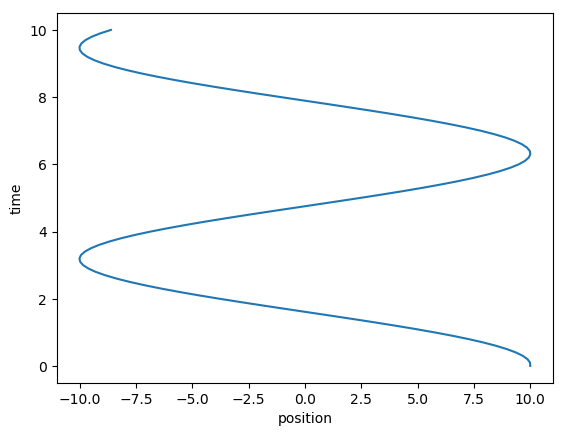

In [93]:
using PyPlot
plot(getindex.(sol.u, 1), sol.t)
xlabel("position")
ylabel("time");

In [4]:
using DifferentialEquations, Unitful
import Unitful: s, N

f(y,p,t) = 0.5*y/3.0 * 1.0N/s
u0 = 0.1N
tspan = (0.0s,1.0s)


prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5())

Unitful.DimensionError: DimensionError: N s^-1 and 0.016666666666666666 N^2 s^-1 are not dimensionally compatible.

This gives a a normal solution object. Notice that the values are all with the correct units.

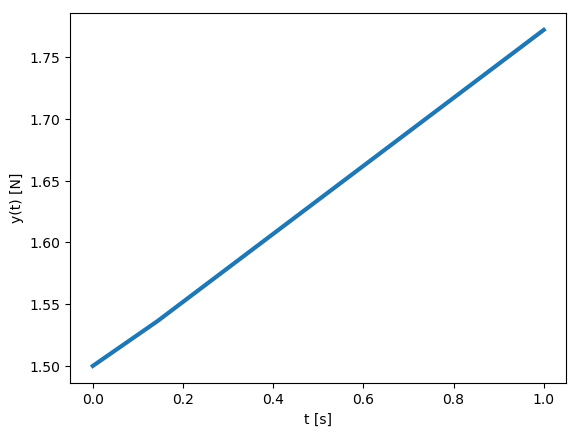

In [16]:
using PyPlot

plot(ustrip.(sol.t),ustrip.(sol[:]),lw=3)

xlabel("t [$(unit(sol.t[1]))]"); ylabel("y(t) [$(unit(sol[1]))]");